# <center>Classification on Abalone dataset</center> 

<h2>What is Abalone: </h2>

A huge snail of the species Haliotis with a bowl-shaped shell that is covered in a row of breathing holes. The shell is used for decoration and as a source of mother-of-pearl, while the flesh is consumed.

**<h2>Dataset Description:</h2>**

The 1995 publication of the UC Irvine Machine Learning Repository served as the source for the Abalone dataset. The attributes and physical characteristics of abalones, such as their number of rings, sex, length, diameter, height, and weight, are represented by each row in the dataset. The researchers visually counted the number of rings under a microscope. The number of rings plus 1.5 years of life span is used to calculate an abalone's age.

<h2>Correlation between the economic value and the age of the abalone</h2>

"Abalone is a rich nutritious food resource in the many parts of the world. The
economic value of abalone is positively correlated with its age. However, determining the age of
abalone is a cumbersome as well as expensive process which increases the cost and limits its
popularity." Age and the economic worth of abalone are positively connected. Therefore, it's critical for both farmers and consumers to precisely estimate the age of abalone in order to set its price. It's similar to estimating a tree's age to determine an abalone's actual age. As an abalone matures, rings are typically generated in its shell at a pace of one per year.
An abalone's shell must be sliced in order to reach the rings. A lab technician counts the rings on a sample of a shell after polishing and dyeing it. The researchers reasoned that rounding up the ring count by 1.5 to account for some rings that are difficult to distinguish using this technique is a reasonable estimate of the abalone's age. This intricate process raises the price and reduces its appeal. Therefore, researchers are eager in establishing a relationship between abalone length, height, and weight and age. The growers would cut costs and buyers would receive the anticipated products if a reasonably accurate model could be developed to predict the age of abalone.

<h2>The physical Process of Age Predication:</h2>
Cutting the shell through the cone, staining it, and counting the number of rings under a microscope are the tedious and time-consuming steps involved in determining the age of an abalone.

<h2> The aim of the project</h2>

We can develop a classifier that classifies the abalone's age base on all the characteristics of the abalone exept the number of rings as it is the process that makes the abalone expensive but will have 4 classes based on a threshold not the actual age number

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import tree
from sklearn.preprocessing import LabelEncoder 
from sklearn import linear_model
from sklearn.metrics import classification_report

In [2]:
#reading the dataset
df = pd.read_csv("abalone_csv.csv")
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**<h2>Dataset Preprocessing:</h2>** 

In [3]:
#Checking dataset dimensions 
df.shape

(4177, 9)

In [4]:
#Checking the data types
df.dtypes

Sex                       object
Length                   float64
Diameter                 float64
Height                   float64
Whole_weight             float64
Shucked_weight           float64
Viscera_weight           float64
Shell_weight             float64
Class_number_of_rings      int64
dtype: object

In [5]:
#Getting the percentage of missing values in each column  
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percent_missing': percent_missing})
missing_value_df

,Percent_missing
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole_weight,0.0
Shucked_weight,0.0
Viscera_weight,0.0
Shell_weight,0.0
Class_number_of_rings,0.0


In [6]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Class_number_of_rings  
0             0.1010        0.1500                     15  
1             0.0485        0.0

After getting the info I found that the sex attribute has 3 different values M,F and I, after a little search we found that the researchers cannot identify the gender of the abalones when they are Infants, so thats why they added I in the sex column!

In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
#The min value of Height column is 0 so, it is not logic to have a 0 Height
#Handeling the 0 values in Height column 
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [9]:
df.drop(index = [1257, 3996], axis = 0, inplace = True)

In [10]:
##df.loc[1257], df.loc[3996] 

In [11]:
#Checking for Outliers using boxplot for visualization  
def boxPlot (df, col):
    df.boxplot(column = [col])
    plt.grid(False)
    plt.show()

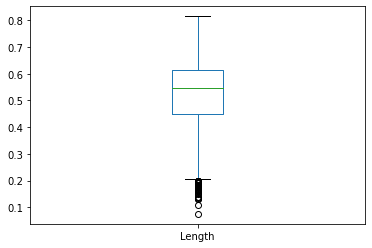

In [12]:
boxPlot(df, 'Length')

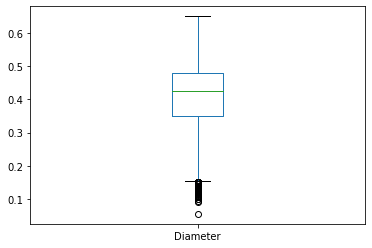

In [13]:
boxPlot(df, 'Diameter')

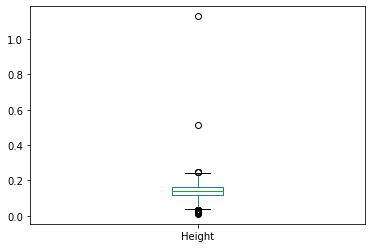

In [14]:
boxPlot(df,'Height')

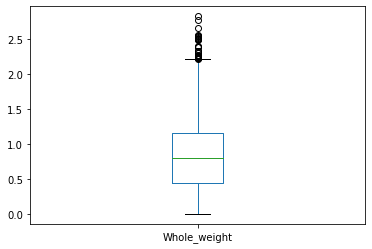

In [15]:
boxPlot(df, 'Whole_weight')

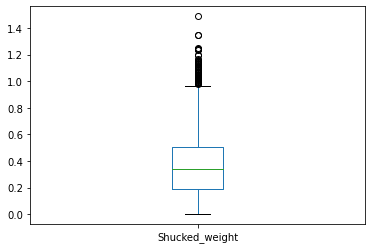

In [16]:
boxPlot(df,'Shucked_weight')

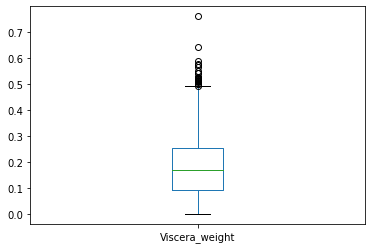

In [17]:
boxPlot(df,'Viscera_weight')

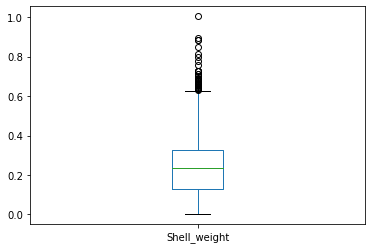

In [18]:
boxPlot(df, 'Shell_weight')

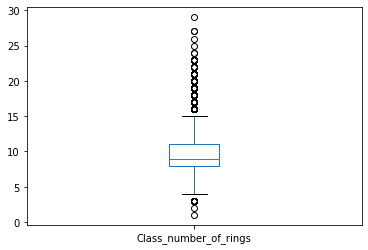

In [19]:
boxPlot(df,'Class_number_of_rings')

In [20]:
# using inter quartile range
def Outliers(df, col):
    Qu1 = df[col].quantile(0.95) 
    Qu2 = df[col].quantile(0.05)
    
    IQR = Qu2 - Qu1
    
    LB = Qu1 - 1.5 * IQR
    UB = Qu2 + 1.5 * IQR
    
    listt = df.index[(df[col]< LB | df[col] > UB)]
    return listt

In [21]:
#LL = []
#for i in ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight',  'Class_number_of_rings']:
#    LL.extend(Outliers(df, i))
#LL

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>],
       [<AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Class_number_of_rings'}>]],
      dtype=object)

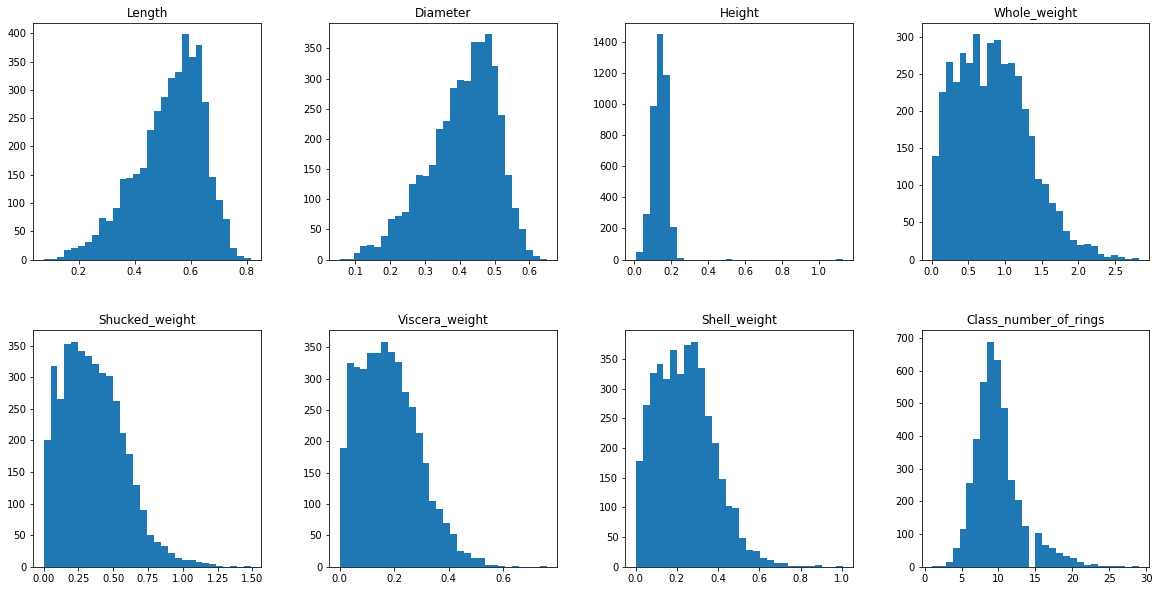

In [22]:
# Visualization data distrbution 
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

<AxesSubplot:>

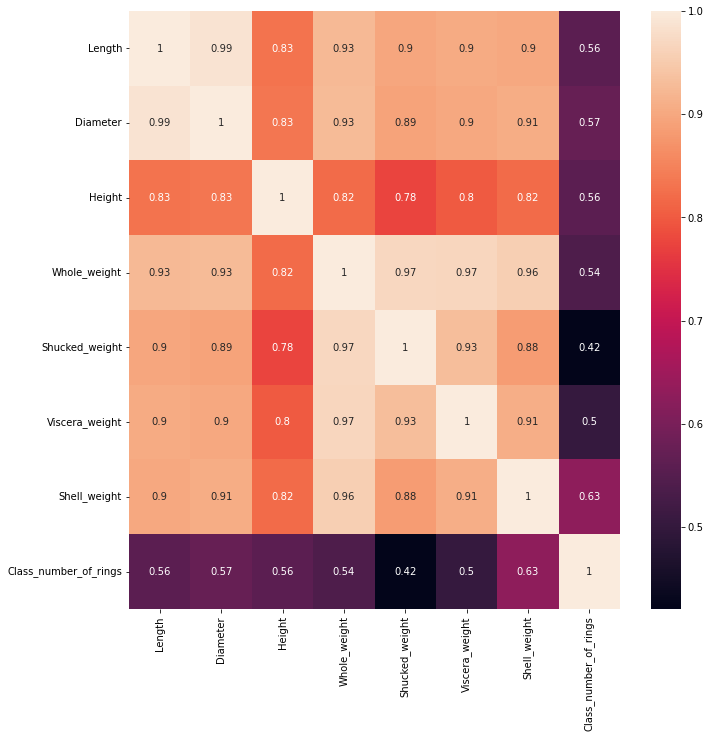

In [23]:
#Data Correlation 
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

In [24]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [25]:
df['Sex'].value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sex'>

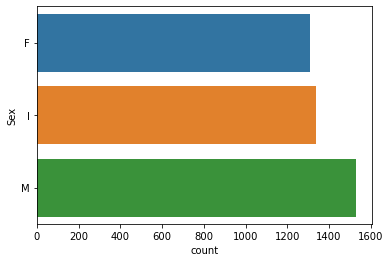

In [26]:
sns.countplot(y = 'Sex', data = df, order = df['Sex'].value_counts(ascending=True).index)

In [27]:
#Max number of males
df[df['Sex'] == 'M'].Class_number_of_rings.max()

27

In [28]:
#Min number of males
df[df['Sex'] == 'M'].Class_number_of_rings.min()

3

In [29]:
#Max number of Infants
df[df['Sex'] == 'I'].Class_number_of_rings.max()

21

In [30]:
#Min number of Infants
df[df['Sex'] == 'I'].Class_number_of_rings.min()

1

In [31]:
#Max number of females
df[df['Sex'] == 'F'].Class_number_of_rings.max()

29

In [32]:
#Max number of females
df[df['Sex'] == 'F'].Class_number_of_rings.min()

5

<h2>My theory</h2>
My theory was that we can classify the dataset as I the group of young Abalones, and the F and M are the old abalones as the researchers cannot specify the gender of the abalone while they are still young; but for my surprise the Max number of rings(which is the age + 1.5) in the I class is 21 and the Min number of rings in the F is 5 and in M is 3 so it is not logical.
So, I'm going to add an extra column to be my target that will be based on a specific threshold 


<AxesSubplot:xlabel='Sex', ylabel='Class_number_of_rings'>

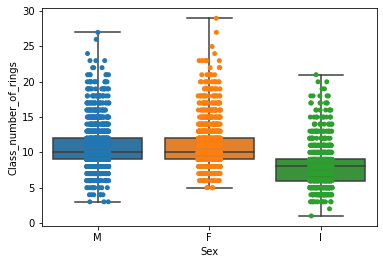

In [33]:
sns.boxplot(x = 'Sex',y = 'Class_number_of_rings', data = df, whis = np.inf)
sns.stripplot(x = 'Sex',y = 'Class_number_of_rings', data = df, jitter = True)

After the previous plot, it is clearly that the I class is more dense approximately in the rage from 3.5 to 9.5, so the class of the young ablones will be till 10 rings, and the rest will be the second class old abalones  

In [34]:
df[(df['Class_number_of_rings'] <= 10 )] #young

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [35]:
df[(df['Class_number_of_rings'] > 10)] #old 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
...,...,...,...,...,...,...,...,...,...
4148,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11
4160,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
4161,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [36]:
#Replacing the 'Class_number_of_rings' to 2 class young and old 
#for i in df.index:
#    classes = df.loc[i]
#    if classes['Class_number_of_rings'] <= 10:
#        df.loc[i, 'Class_number_of_rings'] = 'young'
#    else:
#        df.loc[i, 'Class_number_of_rings'] = 'old'

In [37]:
#df.head()

After thinking, it wasn't logical to classify the age to young and old only as it will be a very wide range for the price classification.
So, insted I will classify them to 4 categories to be most suitable with the market 

In [38]:
#Replacing the 'Class_number_of_rings' to 4 categories (for the target column)
for i in df.index:
    categories = df.loc[i]
    if categories.Class_number_of_rings <= 8:
        df.loc[i, 'Class_number_of_rings'] = 1 # category1
        
    elif categories['Class_number_of_rings'] > 24:
        df.loc[i, 'Class_number_of_rings'] = 4 #category4
        
    elif categories.Class_number_of_rings > 15 & categories.Class_number_of_rings <= 24:
        df.loc[i, 'Class_number_of_rings'] = 3 #category3
        
    elif categories.Class_number_of_rings > 8 & categories.Class_number_of_rings <= 15:
        df.loc[i, 'Class_number_of_rings'] = 2 #category2
        

In [39]:
#grouping the values count of each category
df['Class_number_of_rings'].value_counts()

2    2509
1    1405
3     256
4       5
Name: Class_number_of_rings, dtype: int64

In [40]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [41]:
#renaming the column Class_number_of_rings to AgeCategory to be more relevent
df.rename(columns = {'Class_number_of_rings':'AgeCategory'}, inplace = True)

In [42]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeCategory
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [43]:
#using LabelEncoder to encode the Sex column to be numerical values 
Gender_ = LabelEncoder()
df['Gender'] = Gender_.fit_transform(df['Sex'])

In [44]:
df.drop(['Sex'], axis =1, inplace = True)

In [45]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeCategory,Gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,1


<h2>Splitting the data:</h2>

In [46]:
YAbalone = df['AgeCategory']
XAbalone = df.drop('AgeCategory', axis=1)

In [47]:
XAbalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [48]:
YAbalone.head()

0    2
1    1
2    2
3    2
4    1
Name: AgeCategory, dtype: int64

In [49]:
XAbalone.tail()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,2


In [50]:
#Splitting to test and train sets 
X_train, X_test, y_train, y_test = train_test_split(XAbalone, YAbalone, test_size=0.4, random_state=42)

<h2>Learning Curve Function</h2>

In [51]:
def LearningCurve(Classifier):
    train_sizes, train_scores, test_scores = learning_curve(Classifier, XAbalone, YAbalone, cv = 5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

<h2>Confussion Matrix Function Before FS

In [52]:
def ConfussionMatrixBefore(Classifier):
    plot_confusion_matrix(Classifier, X_test, y_test)  
    plt.title('Confussion Matrix')
    plt.show()

<h1>ML Models:</h1>

<h2>K-Nearest Neighbor Before Feature selection</h2>

In [53]:
knn1 = KNeighborsClassifier(n_neighbors = 8, p = 4, metric = 'euclidean')
knn1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn1.score(X_test, y_test)))

Accuracy on training set: 0.798
Accuracy on test set: 0.782


<h2>Learning Curve of KNN Before FS

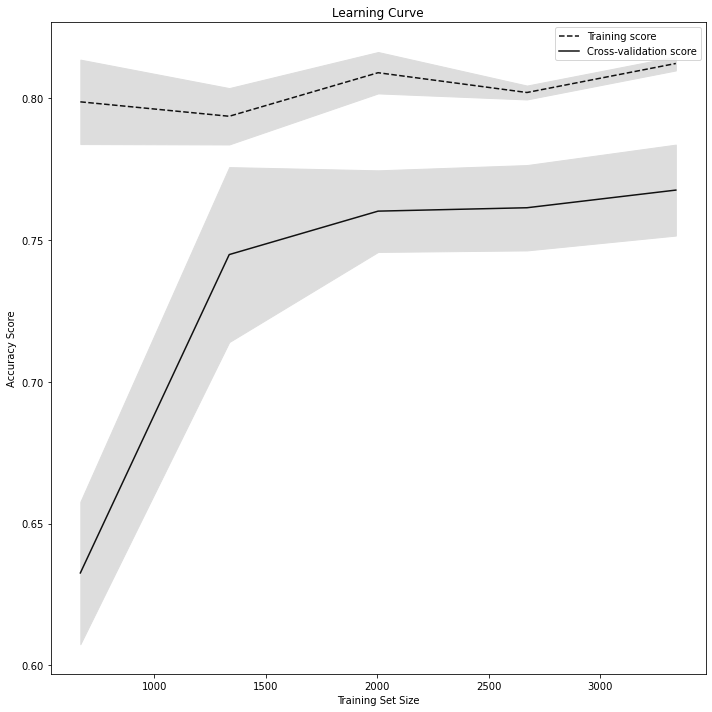

In [54]:
LearningCurve(knn1) 

In [105]:
yPreKnn = knn1.predict(X_test)

In [106]:
cf_rep = classification_report(y_test, yPreKnn, target_names=["1", "2", "3", "4"])
print(cf_rep)

              precision    recall  f1-score   support

           1       0.77      0.74      0.76       566
           2       0.79      0.88      0.83      1007
           3       1.00      0.03      0.06        96
           4       0.00      0.00      0.00         1

    accuracy                           0.78      1670
   macro avg       0.64      0.41      0.41      1670
weighted avg       0.79      0.78      0.76      1670



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>Confussion Matrix before FS

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


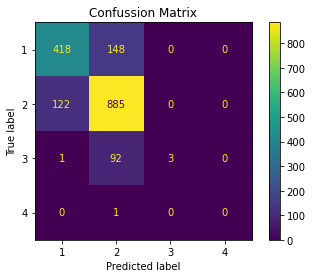

In [55]:
ConfussionMatrixBefore(knn1)

<h2>Decision tree Before Feature selection</h2>

In [56]:
treecf1 = DecisionTreeClassifier(random_state=0)
treecf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treecf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(treecf1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.711


<h2>Learning Curve of Decision tree Before Feature selection

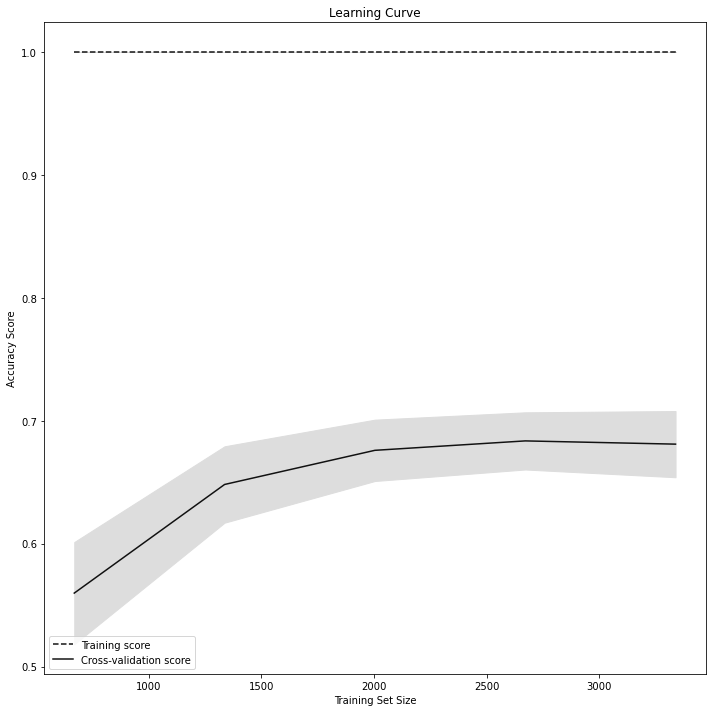

In [94]:
LearningCurve(treecf1) 

<h2>classification_report

In [103]:
ypreTreeB = treecf1.predict(X_test)

In [104]:
cf_rep = classification_report(y_test, ypreTreeB, target_names=["1", "2", "3", "4"])
print(cf_rep)

              precision    recall  f1-score   support

           1       0.70      0.70      0.70       566
           2       0.77      0.76      0.76      1007
           3       0.26      0.28      0.27        96
           4       0.00      0.00      0.00         1

    accuracy                           0.71      1670
   macro avg       0.43      0.43      0.43      1670
weighted avg       0.71      0.71      0.71      1670



<h2> Confussion Matrix of Decision tree Before FS

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


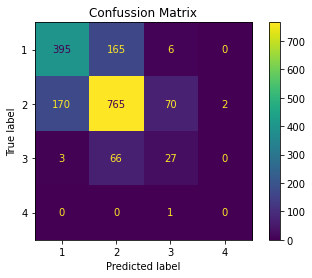

In [58]:
ConfussionMatrixBefore(treecf1)

<h2>Logistic Regression Before Feature Selection</h2>

In [59]:
LR1 = linear_model.LogisticRegression(max_iter=120)
LR1.fit(X_train, y_train)

LogisticRegression(max_iter=120)

In [60]:
print("Accuracy on training set: {:.3f}".format(LR1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR1.score(X_test, y_test)))

Accuracy on training set: 0.763
Accuracy on test set: 0.768


In [61]:
LR1.score(X_test,y_test)

0.7676646706586826

<h2>Learning curve before FS

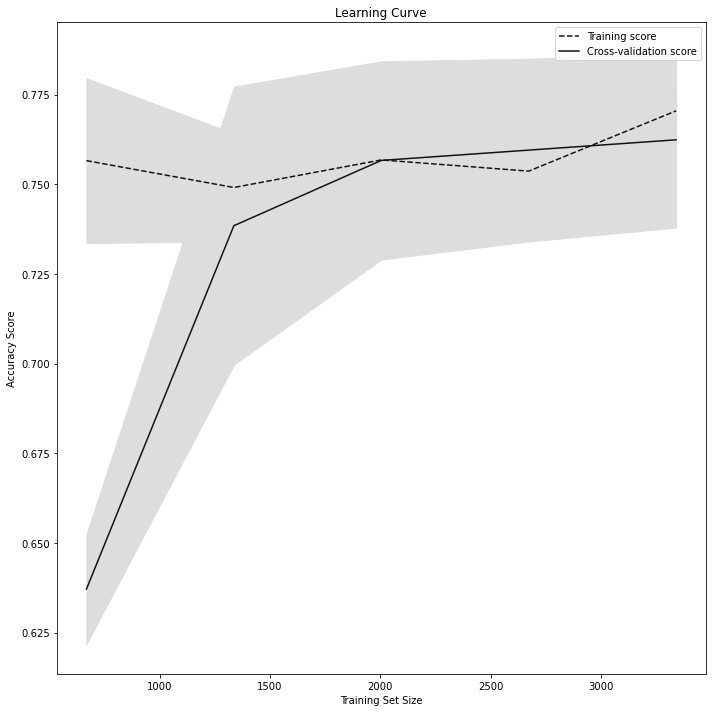

In [62]:
LearningCurve(LR1) 

In [101]:
YpreLR1 = LR1.predict(X_test)

<h2>classification_report</h2>

In [102]:
cf_rep = classification_report(y_test, YpreLR1, target_names=["1", "2", "3", "4"])
print(cf_rep)

              precision    recall  f1-score   support

           1       0.76      0.69      0.73       566
           2       0.77      0.88      0.82      1007
           3       0.75      0.03      0.06        96
           4       0.00      0.00      0.00         1

    accuracy                           0.77      1670
   macro avg       0.57      0.40      0.40      1670
weighted avg       0.77      0.77      0.75      1670



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#Models = ['KNN','Decision tree','Logistic Regression']
#Before = [0.798, 1.000, 0.763]
#After = [0.800,1.000,0.758]

<h2>Confussion Matrix of logistic regression Before FS 

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


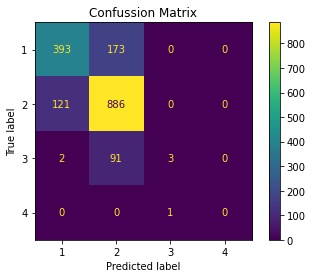

In [64]:
ConfussionMatrixBefore(LR1)

<h2>Feature Selection: Exhaustive Feature Selection:</h2>
I will use Exhaustive Feature Selection as it is great with a small number of features and also as the dataset is highly correlated so i couldn't use the filter method  

In [65]:
efs = EFS(KNeighborsClassifier(n_neighbors=4),
         min_features= 1,
          max_features= 8,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 255/255

In [66]:
df1 = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df1 = df1[["feature_idx","avg_score"]]
df1

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,avg_score
0,"(0,)",0.72016
1,"(1,)",0.72495
2,"(2,)",0.66986
3,"(3,)",0.786427
4,"(4,)",0.768463
...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",0.816367
251,"(0, 1, 3, 4, 5, 6, 7)",0.819561
252,"(0, 2, 3, 4, 5, 6, 7)",0.822754
253,"(1, 2, 3, 4, 5, 6, 7)",0.818762


In [67]:
efs.best_score_

0.8287425149700599

In [68]:
efs.best_feature_names_

('Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Gender')

In [69]:
efs.best_idx_

(1, 2, 3, 4, 5, 7)

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

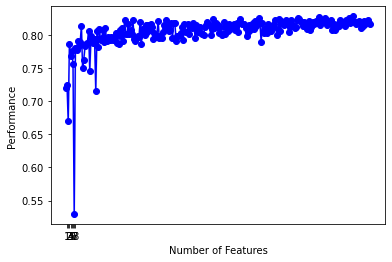

In [70]:
#Performance Plotting
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(efs.get_metric_dict(), kind='std_dev')

In [71]:
efs.transform(XAbalone)

array([[0.365 , 0.095 , 0.514 , 0.2245, 0.101 , 2.    ],
       [0.265 , 0.09  , 0.2255, 0.0995, 0.0485, 2.    ],
       [0.42  , 0.135 , 0.677 , 0.2565, 0.1415, 0.    ],
       ...,
       [0.475 , 0.205 , 1.176 , 0.5255, 0.2875, 2.    ],
       [0.485 , 0.15  , 1.0945, 0.531 , 0.261 , 0.    ],
       [0.555 , 0.195 , 1.9485, 0.9455, 0.3765, 2.    ]])

In [72]:
XAbalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


<h3> Deleting the unnecessary features</h3>


In [73]:
XAbalone.drop(['Length', 'Shell_weight'], axis = 1, inplace = True)

In [74]:
XAbalone.head()

,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Gender
0,0.365,0.095,0.5140,0.2245,0.1010,2
1,0.265,0.090,0.2255,0.0995,0.0485,2
2,0.420,0.135,0.6770,0.2565,0.1415,0
3,0.365,0.125,0.5160,0.2155,0.1140,2
4,0.255,0.080,0.2050,0.0895,0.0395,1


In [75]:
#Splitting into train and test after the feature selection 
X_train1, X_test1, y_train1, y_test1 = train_test_split(XAbalone, YAbalone, test_size=0.4, random_state=42)

<h2>Confussion Matrix Function</h2>

In [76]:
def ConfussionMatrix(Classifier):
    plot_confusion_matrix(Classifier, X_test1, y_test1)  
    plt.title('Confussion Matrix')
    plt.show()

<h2>K-Nearest Neighbor after Feature selection</h2>

In [77]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train1, y_train1)
    y_pred = knn.predict(X_test1)
    scores.append(metrics.accuracy_score(y_test1, y_pred))

Text(0, 0.5, 'Testing Accuracy')

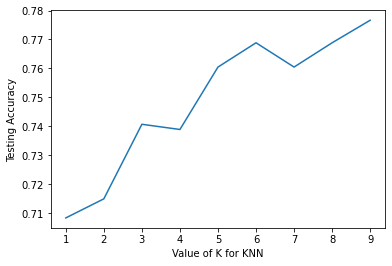

In [78]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [79]:
#K = 8 gives the highest accuracy
knn = KNeighborsClassifier(n_neighbors = 8, p = 4, metric = 'euclidean')
knn.fit(X_train1, y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=8, p=4)

In [80]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test1, y_test1)))

Accuracy on training set: 0.800
Accuracy on test set: 0.769


<h2>Classification report</h2>

In [81]:
cf_rep = classification_report(y_test, y_pred, target_names=["1", "2", "3", "4"])
print(cf_rep)

              precision    recall  f1-score   support

           1       0.79      0.69      0.73       566
           2       0.77      0.89      0.83      1007
           3       0.73      0.08      0.15        96
           4       0.00      0.00      0.00         1

    accuracy                           0.78      1670
   macro avg       0.57      0.42      0.43      1670
weighted avg       0.77      0.78      0.76      1670



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>Confussion Matrix of KNN</h2>

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


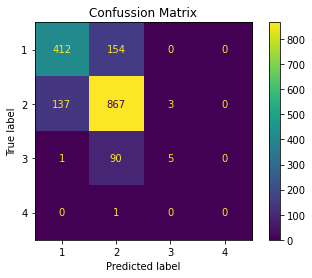

In [82]:
ConfussionMatrix(knn)

<h2>Learning Curve of KNN</h2>

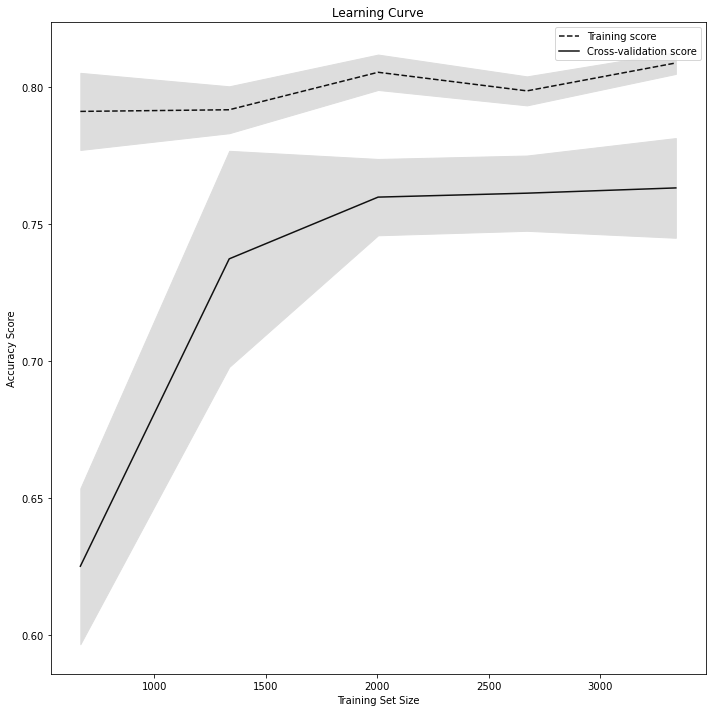

In [83]:
LearningCurve(knn)

<h2>Decision Tree After Feature Selection</h2>

In [84]:
treecf = DecisionTreeClassifier(random_state=0)
treecf.fit(X_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(treecf.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(treecf.score(X_test1, y_test1)))

Accuracy on training set: 1.000
Accuracy on test set: 0.693


In [96]:
PreTree = treecf.predict(X_test1)

<h2>Classification report</h2>

In [97]:
cf_rep = classification_report(y_test, PreTree, target_names=["1", "2", "3", "4"])
print(cf_rep)

              precision    recall  f1-score   support

           1       0.65      0.70      0.67       566
           2       0.76      0.73      0.75      1007
           3       0.28      0.29      0.29        96
           4       0.00      0.00      0.00         1

    accuracy                           0.69      1670
   macro avg       0.43      0.43      0.43      1670
weighted avg       0.70      0.69      0.70      1670



In [85]:
print(tree.export_text(treecf))

|--- feature_4 <= 0.11
|   |--- feature_1 <= 0.10
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_0 <= 0.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.25
|   |   |   |   |   |--- feature_1 <= 0.10
|   |   |   |   |   |   |--- feature_2 <= 0.30
|   |   |   |   |   |   |   |--- feature_2 <= 0.22
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.04
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.21
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.21
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_4 >  0.04
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_2 >  0.22
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  0.30
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  0.10
|   |   |   |   

<h2>Confussion Matrix of Decision Tree</h2>

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


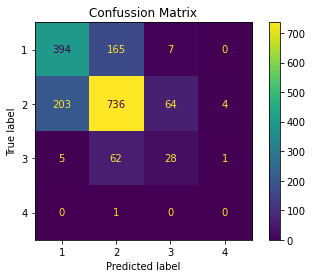

In [86]:
ConfussionMatrix(treecf)

<h2>Learning Curve of Decision Tree</h2>

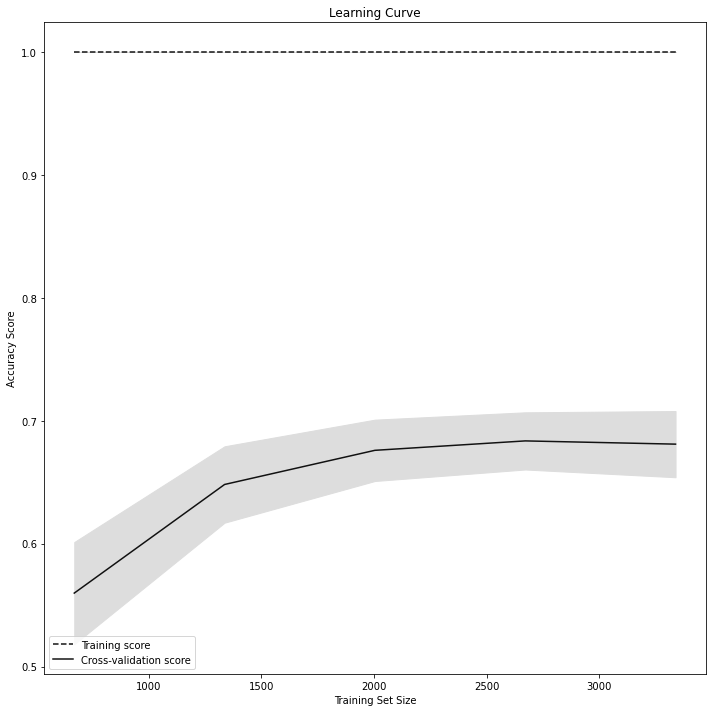

In [87]:
LearningCurve(treecf)

<h2>Logistic Regression After Feature Selection</h2>

In [88]:
LR = linear_model.LogisticRegression(max_iter=120)
LR.fit(X_train1, y_train1)

LogisticRegression(max_iter=120)

In [89]:
print("Accuracy on training set: {:.3f}".format(LR.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test1, y_test1)))

Accuracy on training set: 0.758
Accuracy on test set: 0.763


In [90]:
LR.score(X_test1,y_test1)

0.7634730538922155

In [98]:
PreLR = LR.predict(X_test1)

<h2>Classification report</h2>

In [99]:
cf_rep = classification_report(y_test, PreLR, target_names=["1", "2", "3", "4"])
print(cf_rep)

              precision    recall  f1-score   support

           1       0.76      0.69      0.72       566
           2       0.77      0.88      0.82      1007
           3       0.50      0.01      0.02        96
           4       0.00      0.00      0.00         1

    accuracy                           0.76      1670
   macro avg       0.51      0.39      0.39      1670
weighted avg       0.75      0.76      0.74      1670



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>Confussion Matrix of Logistic Regression</h2>

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


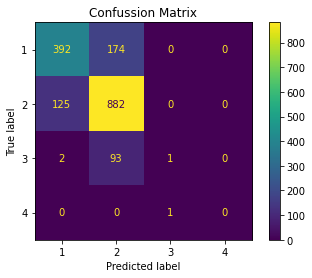

In [91]:
ConfussionMatrix(LR)

<h2>Learning Curve of Logistic Regression</h2>

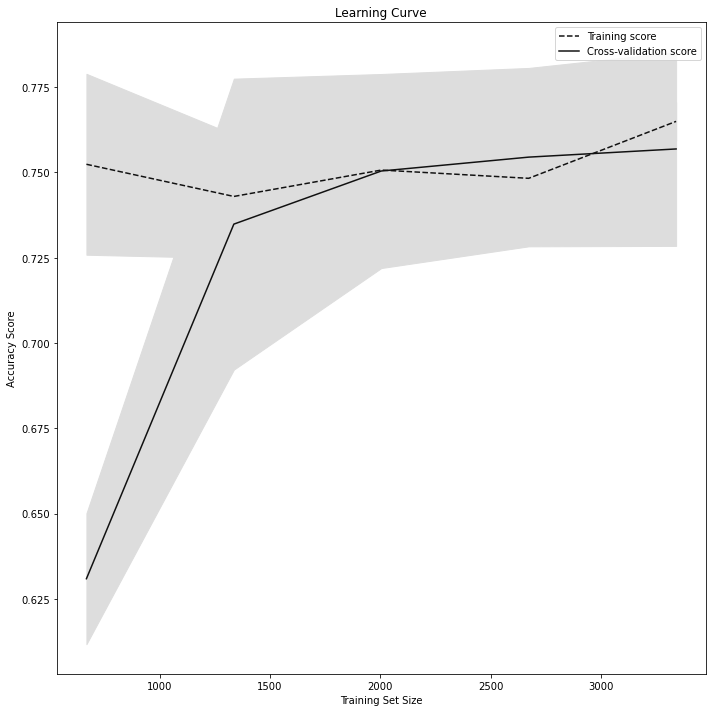

In [92]:
LearningCurve(LR)